<a href="https://colab.research.google.com/github/yuvalofek/FrequentistML/blob/master/FreqML5_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Frequentist ML Assignment 5 - Random Forests**

Yuval Epstain Ofek & Theo Jaquenoud


---


**The Prompt:**

Replicate figure 15.3 comparing random forests and gradient boosted trees. You can use whatever package you wish, you don't have to use xgboost if you'd rather keep everything in sci-kit learn. Compare the feature importance found by random forests and gradient boosted trees. 

Select another dataset and repeat the analysis. Pick a dataset we have not yet studied in class.

**Summary:**


*   Get the california Housing Data
*   Train 2 RF (m=2, 6) and 2 GBM (depth = 4,6)
*   Plot Test Average Absolute Error vs. Number of Trees (up to 250 trees)
*   Plot Feature Importance


*   Repeat above for a 2nd dataset

Note: No need to find ideal hyperparameters




In [ ]:
#import stuff
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#from tabulate import tabulate

import sklearn.datasets
from sklearn.model_selection import train_test_split  #for spliting data
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import GradientBoostingRegressor as gbr
from sklearn.metrics import mean_absolute_error as mae

## California Housing Dataset

In [ ]:
#sklearn has the california housing dataset already, lucky us
sklearn_housing = sklearn.datasets.fetch_california_housing()
cali = pd.DataFrame(sklearn_housing['data'],
                    columns = sklearn_housing['feature_names'])
cali['Target'] = sklearn_housing['target']
cal = cali.to_numpy()
cali.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
#Parameters
val_split = 0.8
min_estimators = 1
max_estimators = 250
SEED = 123

np.random.seed(SEED)

In [ ]:
#splitting the data
X_train, X_val, y_train, y_val = train_test_split(cal[:,:-1],
                                                  cal[:,-1],
                                                  test_size = val_split,
                                                  random_state = SEED
                                                  )

In [ ]:
#Declaring the models we want
trees = {'RF m=2': rfr(max_features = 2),
         'RF m=6':rfr(max_features =6),
         'GBM depth=4': gbr(max_depth = 4),
         'GBM depth=6': gbr(max_depth = 6)}

In [ ]:
#Training 
losses = {}
for name, tree in trees.items():
  losses[name] = []
  for i in range(min_estimators, max_estimators + 1):
      tree.set_params(n_estimators=i)
      tree.fit(X_train, y_train)

      losses[name].append(mae(y_val, tree.predict(X_val)))      

In [ ]:
### Plot
marker_style = dict(linestyle=':', marker='o',
                    markersize=10, fillstyle='none')

plt.figure(figsize = (12,12))
n_est = range(min_estimators, max_estimators + 1)
for name, lss in losses.items():
  plt.plot(n_est, lss, label = name, **marker_style)
plt.xlabel('Number of Estimators', fontsize = 12)
plt.ylabel('Validation Mean Absolute Error', fontsize = 12)
plt.title('California Housing Data', fontsize = 16)
plt.legend()
plt.show()



In [ ]:
feat_names = cali.columns.tolist()[:-1]

f, ax = plt.subplots(2,2, figsize = (17,17))
i = 0
for name, tree in trees.items():
  features = tree.feature_importances_
  features, names = zip(*sorted(zip(features, feat_names)))
  ax[i//2, i%2].barh(names, features)
  ax[i//2, i%2].set_xlabel('Relative Importance')
  ax[i//2, i%2].set_title(name)
  i = i+1

ax[1,1]
plt.show()

## Second Dataset

In [ ]:
#in this dataset, we want to try to predict the critical temperature of
#a potential superconducter, using a variety of material properties relating
#to mass, size, conductivity, entropy, thermal properties etc...

df_super = pd.read_csv('train.csv')

#The dataset has 81 features, the first time we trained the model it took over half an hour
#and most of the variables were completely insignificant with a relative importance near 0.
#So here we preselected the 10 variables with the highest relative importance.
df_super = df_super[['range_ThermalConductivity', 'range_atomic_radius', 'wtd_std_ThermalConductivity',
                  'wtd_gmean_ThermalConductivity', 'wtd_std_ElectronAffinity','std_atomic_mass',
                  'wtd_range_ElectronAffinity', 'std_Density', 'gmean_ElectronAffinity','wtd_mean_Valence'
                  ,'critical_temp']]

super = df_super.to_numpy()
df_super.head()

,range_ThermalConductivity,range_atomic_radius,wtd_std_ThermalConductivity,wtd_gmean_ThermalConductivity,wtd_std_ElectronAffinity,std_atomic_mass,wtd_range_ElectronAffinity,std_Density,gmean_ElectronAffinity,wtd_mean_Valence,critical_temp
0,399.97342,205,138.517163,0.621979,42.558396,51.968828,80.987143,3306.162897,60.123179,2.257143,29.0
1,429.97342,205,139.630922,0.619735,41.667621,47.094633,81.207857,3767.403176,69.833315,2.257143,26.0
2,399.97342,205,138.540613,0.619095,41.639878,51.968828,81.207857,3306.162897,60.123179,2.271429,19.0
3,399.97342,205,138.528893,0.620535,42.102344,51.968828,81.097500,3306.162897,60.123179,2.264286,22.0
4,399.97342,205,138.493671,0.624878,43.452059,51.968828,80.766429,3306.162897,60.123179,2.242857,23.0


In [ ]:
#splitting the data
X2_train, X2_val, y2_train, y2_val = train_test_split(super[:,:-1],
                                                  super[:,-1],
                                                  test_size = val_split,
                                                  random_state = SEED
                                                  )

In [ ]:
#Training 
losses = {}
for name, tree in trees.items():
  losses[name] = []
  for i in range(min_estimators, max_estimators + 1):
      tree.set_params(n_estimators=i)
      tree.fit(X2_train, y2_train)

      losses[name].append(mae(y2_val, tree.predict(X2_val)))  

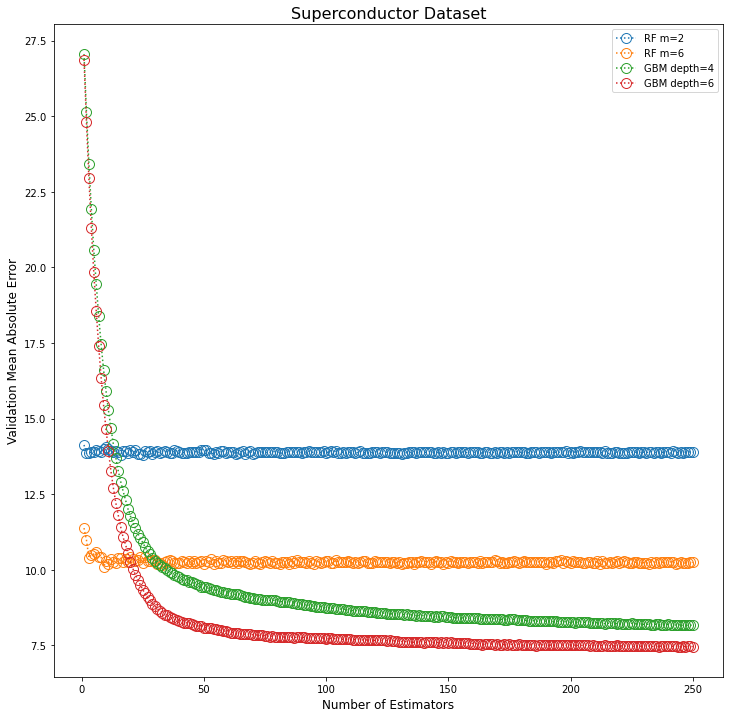

In [ ]:
### Plot
marker_style = dict(linestyle=':', marker='o',
                    markersize=10, fillstyle='none')

plt.figure(figsize = (12,12))
n_est = range(min_estimators, max_estimators + 1)
for name, lss in losses.items():
  plt.plot(n_est, lss, label = name, **marker_style)
plt.xlabel('Number of Estimators', fontsize = 12)
plt.ylabel('Validation Mean Absolute Error', fontsize = 12)
plt.title('Superconductor Dataset', fontsize = 16)
plt.legend()
plt.show()

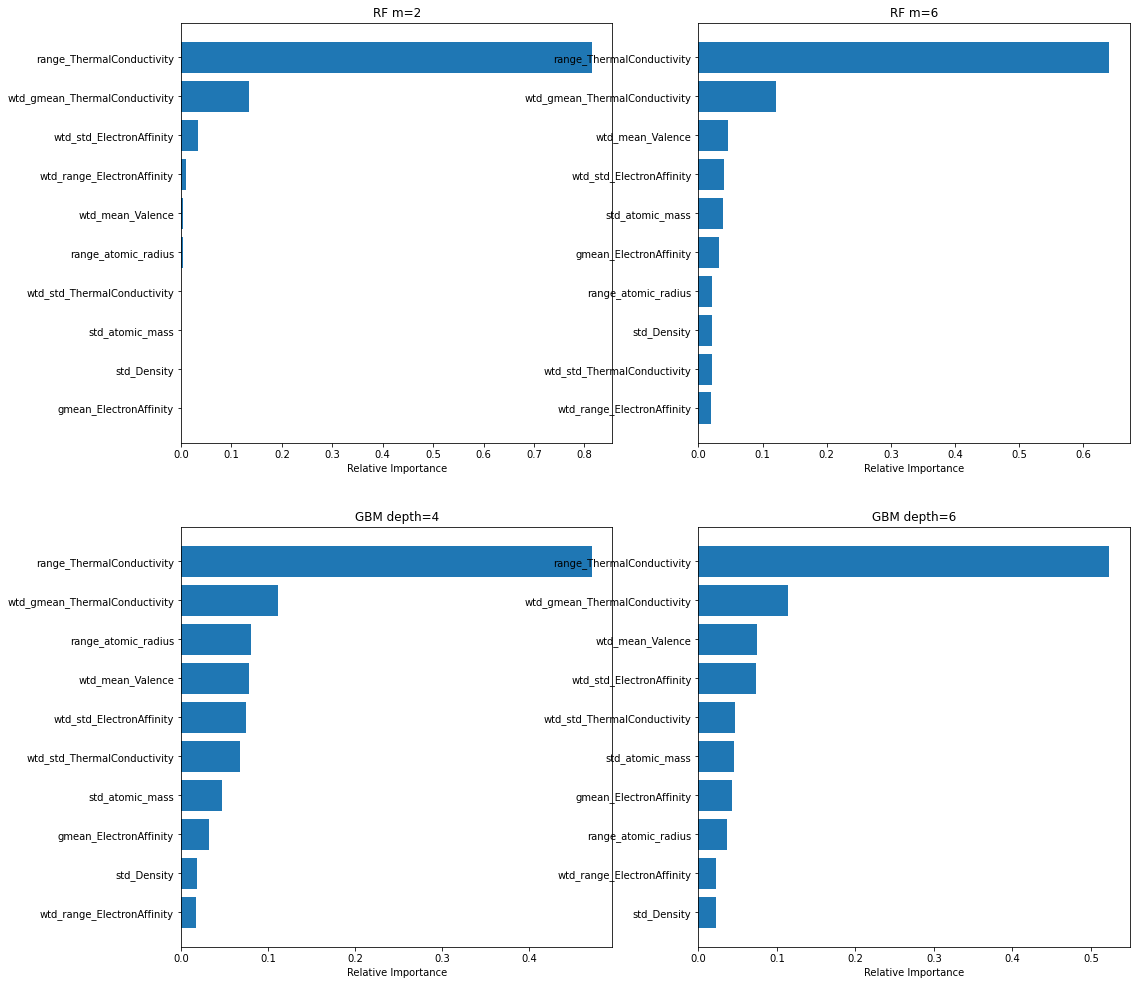

In [ ]:
feat_names = df_super.columns.tolist()[:-1]

f, ax = plt.subplots(2,2, figsize = (17,17))
i = 0
for name, tree in trees.items():
  features = tree.feature_importances_
  features, names = zip(*sorted(zip(features, feat_names)))
  ax[i//2, i%2].barh(names, features)
  ax[i//2, i%2].set_xlabel('Relative Importance')
  ax[i//2, i%2].set_title(name)
  i = i+1

ax[1,1]
plt.show()